# An application of machine learning for the diagnosis of breast cancer

Welcome to our first turorial in jupyter, in which you will see the analysis of breast cancer data extracted from the sklearn.datasetslibrary,through different type of modeling, such as:

- decision tree 
- nayves bayes
- SVM (Support vector machine)
- Random forest

### 1 - Packages

In [50]:
#Load the library with the breast cancer dataset
from sklearn.datasets import load_breast_cancer

# Load pandas
import pandas as pd
# Load numpy
import numpy as np

import matplotlib.pyplot as plt

### 2 - Overview of the data set

In [51]:
# Asiganar un random seed
np.random.seed(0)
# Creas un objeto llamado cancer 
cancer=load_breast_cancer()
# Creas una dataframe con 30 feature variables
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

### 3 - Separate the data 

In [52]:
# Agregamos una nueva columna con the species names,Esto es lo que intentaremos predecir
df['species'] = pd.Categorical.from_codes(cancer.target, cancer.target_names)


# separamos la data.
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75



# Creamos 2 nuevas dataframe , una con the training rows, otra con the test rows
train, test = df[df['is_train']==True], df[df['is_train']==False]


# Mostramos los nuemros de observaciones para the test y training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

# Creamos una lista de the feature column's names
features = df.columns[:30]      


y = pd.factorize(train['species'])[0]
y_test = pd.factorize(test['species'])[0]

Number of observations in the training data: 435
Number of observations in the test data: 134


### 4 - Using a decision tree 

#### 4.1 - Import tree classifier library

In [53]:
#from sklearn.ensemble import tree classifier library
from sklearn import tree

#### 4.2 - Create a DecisionTree and train it

In [54]:
# Create a DecisionTree

clf=tree.DecisionTreeClassifier()
# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(train[features], y)

predic=clf.predict(test[features])
error=clf.score(test[features],y_test,sample_weight=None)
print(error)
#print(clf.predict(test[features]))

predict_porcentaje=clf.predict_proba(test[features])[0:50] 

#print(clf.predict_proba(test[features])[0:50] )

preds = cancer.target_names[clf.predict(test[features])]

print(preds[0:5])

print(test['species'].head())

0.9104477611940298
['malignant' 'malignant' 'malignant' 'malignant' 'malignant']
7     malignant
8     malignant
10    malignant
13    malignant
17    malignant
Name: species, dtype: category
Categories (2, object): [malignant, benign]


#### 4.3 - Create confusion matrix

In [55]:

matrix=pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])

print(matrix)

Predicted Species  benign  malignant
Actual Species                      
malignant               5         43
benign                 79          7


### 5 -  Using a naive bayes

#### 5.1 - Import naive bayes library

In [56]:
#from sklearn import naive bayes
from sklearn.naive_bayes import GaussianNB


#### 5.2 - Create a naive bayes and train it

In [57]:
#Creamos un Gaussiano
clf=GaussianNB()

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(train[features], y)

predic=clf.predict(test[features])
error=clf.score(test[features],y_test,sample_weight=None)
print(error)
#print(clf.predict(test[features]))

predict_porcentaje=clf.predict_proba(test[features])[0:50] 

#print(clf.predict_proba(test[features])[0:50] )

preds = cancer.target_names[clf.predict(test[features])]

print(preds[0:5])

print(test['species'].head())

0.9402985074626866
['malignant' 'malignant' 'malignant' 'benign' 'malignant']
7     malignant
8     malignant
10    malignant
13    malignant
17    malignant
Name: species, dtype: category
Categories (2, object): [malignant, benign]


#### 5.3 - Create confusion matrix

In [58]:
 # Create confusion matrix
matrix=pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])
print(matrix)

Predicted Species  benign  malignant
Actual Species                      
malignant               5         43
benign                 83          3


### 6 -  Using a Support Vector Machine

#### 6.1 - Import  SVM

In [59]:
#De sklearn importamos svm
from sklearn import svm


#### 6.2 - Create a SVM and train it

In [60]:
# Create a SVM
clf=svm.SVC(C=1,kernel='linear')


# Train the Classifier to take the training features and learn how they relate

# PREDECIR SOLO 2 ATRIBUTOS
#features=["worst perimeter","mean concave points"]
clf.fit(train[features], y)

predic=clf.predict(test[features])
error=clf.score(test[features],y_test,sample_weight=None)
print(error)


preds = cancer.target_names[clf.predict(test[features])]

print(preds[0:5])

print(test['species'].head())


0.9626865671641791
['malignant' 'malignant' 'malignant' 'benign' 'malignant']
7     malignant
8     malignant
10    malignant
13    malignant
17    malignant
Name: species, dtype: category
Categories (2, object): [malignant, benign]


#### 6.3 - Create confusion matrix

In [61]:
# Create confusion matrix
matrix=pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])
print(matrix)

Predicted Species  benign  malignant
Actual Species                      
malignant               5         43
benign                 86          0


### 7 -  Using Random Forest

#### 7.1 - Import  RandomForestClassifier

In [62]:
#from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier

#### 7.2 - Create a random forest Classifier and train it

In [63]:
# Creamos un random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=2, random_state=0,n_estimators=600)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)

#features=["worst perimeter","mean concave points"]
clf.fit(train[features], y)

predic=clf.predict(test[features])
error=clf.score(test[features],y_test,sample_weight=None)
print(error)
#print(clf.predict(test[features]))

predict_porcentaje=clf.predict_proba(test[features])[0:50] 

#print(clf.predict_proba(test[features])[0:50] )

preds = cancer.target_names[clf.predict(test[features])]

print(preds[0:5])

print(test['species'].head())

0.9552238805970149
['malignant' 'malignant' 'malignant' 'malignant' 'malignant']
7     malignant
8     malignant
10    malignant
13    malignant
17    malignant
Name: species, dtype: category
Categories (2, object): [malignant, benign]


#### 7.3 - Create confusion matrix

In [64]:
# Creamos una matrix de confusión
matrix=pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])

print(matrix)

Predicted Species  benign  malignant
Actual Species                      
malignant               4         44
benign                 84          2


We can see that the highest precision was obtained with the support vector machine

Precision:

- decision tree :0.91
- nayves bayes :0.94
- SVM (Support vector machine) :0.9626
- Random forest :0.955



### 8 - Looking for important features

After analyzing the precisions of each model, we look for which variables influence more when making the prediction.

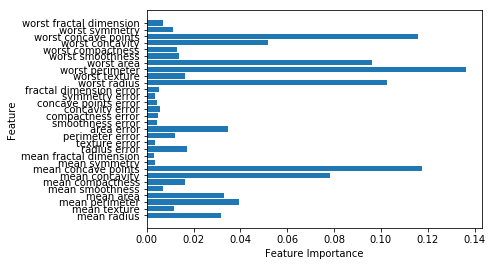

In [65]:

# View a list of the features and their importance scores
importance= list(zip(train[features], clf.feature_importances_))

#print(importance)

n_features = cancer.data.shape[1]
plt.barh(range(n_features), clf.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

### 9 - Analyzing data with these 2 features and using SVM

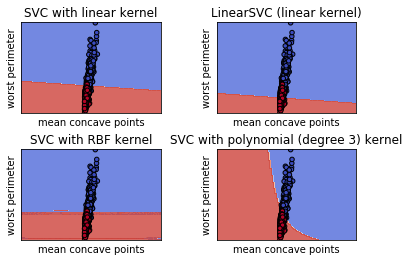

In [66]:
def make_meshgrid(x, y, h=.02):
   
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

import csv
 
X = cancer.data[:,(7,22)]
y = cancer.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors

C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=1),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=1),
          svm.SVC(kernel='poly', degree=3, C=1))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("mean concave points")
    ax.set_ylabel("worst perimeter")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

# THANKS !!!